In [5]:
import pickle
import numpy as np
import pandas as pd
import chess
import chess.engine
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
from keras.callbacks import CSVLogger


In [6]:
data = pd.read_pickle('data/chess_puzzles - Copy.pkl')

In [7]:
# split data into two dataframes - one for 'best_lichess_move_vector' and one for 'best_stockfish_move_vector'
# 'best_lichess_move_vector' is the move that lichess recommends
# 'best_stockfish_move_vector' is the move that stockfish recommends

data_lichess = data[['board','best_lichess_move_vector']]
data_stockfish = data[['board','best_stockfish_move_vector']]

In [8]:
# rename columns to move and board
data_lichess.columns = ['board','move']
data_stockfish.columns = ['board','move']

In [9]:
# split data into training and testing data
# 80% of data is used for training
# 20% of data is used for testing

data_lichess_train = data_lichess.sample(frac=0.8,random_state=200)
data_lichess_valid = data_lichess_train.sample(frac=0.1,random_state=200)
data_lichess_train = data_lichess_train.drop(data_lichess_valid.index)
data_lichess_test = data_lichess.drop(data_lichess_train.index)

data_stockfish_train = data_stockfish.sample(frac=0.8,random_state=200)
data_stockfish_valid = data_stockfish_train.sample(frac=0.1,random_state=200)
data_stockfish_train = data_stockfish_train.drop(data_stockfish_valid.index)
data_stockfish_test = data_stockfish.drop(data_stockfish_train.index)

In [12]:
# convert all numpy arrays to lists from pandas dataframes
# this is necessary because the neural network cannot handle numpy arrays
lichess_train_X = data_lichess_train['board'].apply(lambda x: x.tolist()).iloc[1:].tolist()
lichess_train_Y = data_lichess_train['move'].apply(lambda x: x.tolist()).iloc[1:].tolist()

lichess_valid_X = data_lichess_valid['board'].apply(lambda x: x.tolist()).iloc[1:].tolist()
lichess_valid_Y = data_lichess_valid['move'].apply(lambda x: x.tolist()).iloc[1:].tolist()

lichess_test_X = data_lichess_test['board'].apply(lambda x: x.tolist()).iloc[1:].tolist()
luchess_test_Y = data_lichess_test['move'].apply(lambda x: x.tolist()).iloc[1:].tolist()


In [13]:
import neuralnet_chatgpt_2 as nn

history_lichess, model_lichess = nn.model_cnn2(data=lichess_train_X, labels=lichess_train_Y, valid=(lichess_valid_X,lichess_valid_Y), model_name='model_lichess.h5')

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 8, 8, 8), found shape=(None, 8, 8, 12)


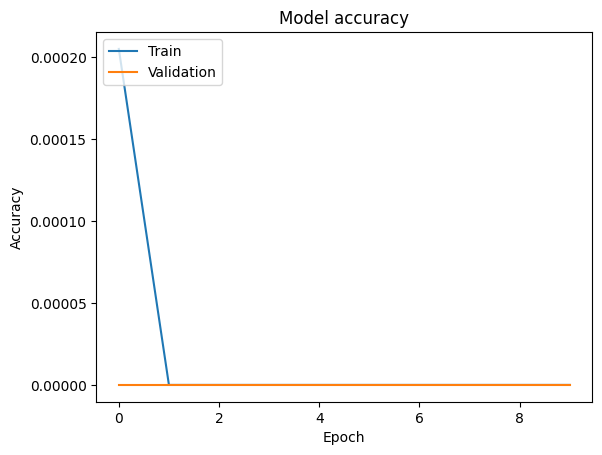

In [ ]:
import matplotlib.pyplot as plt
history = history_lichess
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


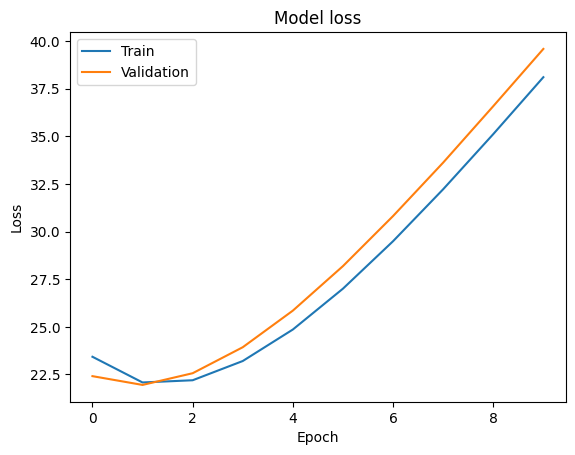

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'lichess_test_X' is not defined